In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### Generate Dataset

In [2]:
x1 = np.random.uniform(low=-1.0, high=1.0, size=100)

print(x1.shape)
x1[0:10]

(100,)


array([-0.44923886, -0.32135659, -0.74464283, -0.07771078,  0.09310982,
        0.08418868, -0.21920593,  0.92776138,  0.07050624,  0.96431797])

In [3]:
x2 = np.random.uniform(low=-1.0, high=1.0, size=100)

print(x2.shape)
x2[0:10]

(100,)


array([ 0.53342798,  0.36626825, -0.00381876, -0.24944952, -0.11568537,
       -0.59927689, -0.4686803 , -0.50963416,  0.36686972,  0.02418261])

In [4]:
y = 0.3 * x1 + 0.5 * x2 + 0.1
y = (y>0).astype('int')
print(y.shape)
y[0:10]

(100,)


array([1, 1, 0, 0, 1, 0, 0, 1, 1, 1])

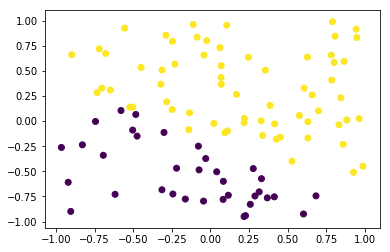

In [5]:
plt.scatter(x1, x2, c=y)

### Sigmoid

In [6]:
def sigmoid(n):
    return 1 / (1 + np.exp(-n))

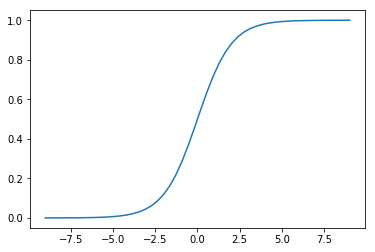

In [7]:
xx = np.linspace(start=-9, stop=+9)
yy = sigmoid(xx)

plt.plot(xx, yy)

### Gradient Descent

In [11]:
num_epoch = 100
learning_rate = 1.0

w1 = np.random.uniform(low=-1.0, high=1.0)
w2 = np.random.uniform(low=-1.0, high=1.0)
b = np.random.uniform(low=-1.0, high=1.0)

for epoch in range(num_epoch):
    y_predict = w1 * x1 + w2 * x2 + b
    y_predict = sigmoid(y_predict)
    
    predict = y_predict > 0.5
    accuracy = (predict == y).mean()
    
    if accuracy> 0.95:
        break

    w1 = w1 - learning_rate * ((y_predict - y) * x1).mean()
    w2 = w2 - learning_rate * ((y_predict - y) * x2).mean()
    b = b - learning_rate * (y_predict - y).mean()

print("----" * 10)
print(f"{epoch:2} accuracy = {accuracy:.6f}")

----------------------------------------
21 accuracy = 0.960000


In [12]:
import pandas as pd

y_predict = w1 * x1 + w2 * x2 + b
y_predict = sigmoid(y_predict)
y_predict = (y_predict>0.5).astype('int')

result = pd.DataFrame({'x1': x1, 'x2': x2, 'y(actual)': y, 'y(predict)': y_predict})

result

,x1,x2,y(actual),y(predict)
0,-0.449239,0.533428,1,1
1,-0.321357,0.366268,1,1
2,-0.744643,-0.003819,0,0
3,-0.077711,-0.249450,0,1
4,0.093110,-0.115685,1,1
5,0.084189,-0.599277,0,0
6,-0.219206,-0.468680,0,0
7,0.927761,-0.509634,1,1
8,0.070506,0.366870,1,1
9,0.964318,0.024183,1,1


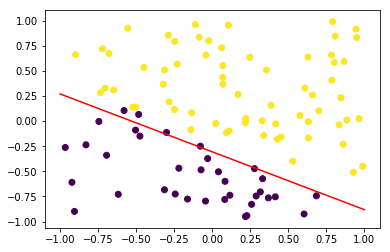

In [14]:
xx = np.linspace(start=-1.0, stop=1.0)
yy = -1.0 * (xx * w1 + b) / w2 ## 왜 마이너스 -1.0 ?

plt.scatter(x1, x2, c=y)
plt.plot(xx, yy,c='r')